In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
#Importing data into dataframe

df = pd.read_csv('../data/raw/fff_Bw_1min.dat', delim_whitespace=True)

print(df)

         2010  6   1  10  50  9.14  22.69  -1.42  -88  1.1    0  6.74e-04
0        2010  6   1  10  51  9.13  22.69  -1.43  -92    1  0.0  0.000765
1        2010  6   1  10  52  9.03   22.7  -1.44  -94    1  0.0  0.000699
2        2010  6   1  10  53  9.02   22.7  -1.45  -95    1  0.0  0.000786
3        2010  6   1  10  54  9.06  22.71  -1.46  -93    1  0.0  0.000748
4        2010  6   1  10  55  8.95  22.72  -1.48  -96    1  0.0  0.000933
...       ... ..  ..  ..  ..   ...    ...    ...  ...  ...  ...       ...
1659509  2018  2  28  14  56  9.87  23.44  -8.84  -94    2  2.0  0.001020
1659510  2018  2  28  14  57  9.93  23.45  -8.85  -90    2  2.0  0.001040
1659511  2018  2  28  14  58  9.96  23.45  -8.85 -100    2  2.0  0.001070
1659512  2018  2  28  14  59  9.92  23.46  -8.85 -111    2  2.0  0.001050
1659513  2018  2  28  15   0  9.98  23.46  -8.86 -120    1  2.0  0.001070

[1659514 rows x 12 columns]


In [3]:
#Adding column names to dataframe

df.columns = ['year', 'month', 'day', 'hour', 'minute', 'L', 'MLT', 'MLAT', 'AL Index', 'KP Index', 'Satellite Flag', 'B']

df.head()

,year,month,day,hour,minute,L,MLT,MLAT,AL Index,KP Index,Satellite Flag,B
0,2010,6,1,10,51,9.13,22.69,-1.43,-92,1,0.0,0.000765
1,2010,6,1,10,52,9.03,22.7,-1.44,-94,1,0.0,0.000699
2,2010,6,1,10,53,9.02,22.7,-1.45,-95,1,0.0,0.000786
3,2010,6,1,10,54,9.06,22.71,-1.46,-93,1,0.0,0.000748
4,2010,6,1,10,55,8.95,22.72,-1.48,-96,1,0.0,0.000933


In [4]:
#Getting information about the data

for (columnName, columnData) in df.iteritems():
    print('Colunm Name : ', columnName)
    print('Column Contents : ', columnData.values)
    print('Unique Values :', columnData.unique())
    print("\n\n")
    

Colunm Name :  year
Column Contents :  [2010 2010 2010 ... 2018 2018 2018]
Unique Values : [2010 2011 2012 2013 2014 2015 2016 2017 2018]



Colunm Name :  month
Column Contents :  [6 6 6 ... 2 2 2]
Unique Values : [ 6  7  8  9 10 11 12  1  2  3  4  5]



Colunm Name :  day
Column Contents :  [ 1  1  1 ... 28 28 28]
Unique Values : [ 1  2  3  4  5  6  7 14 25  9 11 16 18 19 20 24 17 10 22 26 28 30 21 27
 31 13 23  8 12 15 29]



Colunm Name :  hour
Column Contents :  [10 10 10 ... 14 14 15]
Unique Values : [10 11 12 13 14  9 16 17 18 19 20  8  6 15  5  7 21 22 23  0  1  2  3  4]



Colunm Name :  minute
Column Contents :  [51 52 53 ... 58 59  0]
Unique Values : [51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50]



Colunm Name :  L
Column Contents :  [9.13 9.03 9.02 ... 9.96 9.92 9.98]
Unique Values : [ 9.13  9.03  9.02  9.06  8.95  8.93  8.9   8.87  8.86 

In [5]:
#Find missing and NaN values

print("\n Null Value counts :")
df.isnull().sum()


 Null Value counts :


year                   0
month                  0
day                    0
hour                   0
minute                 0
L                      0
MLT                    0
MLAT                   0
AL Index               0
KP Index               0
Satellite Flag         0
B                 255752
dtype: int64

In [6]:
print("\n NaN Value counts :")
df.isna().sum()


 NaN Value counts :


year                   0
month                  0
day                    0
hour                   0
minute                 0
L                      0
MLT                    0
MLAT                   0
AL Index               0
KP Index               0
Satellite Flag         0
B                 255752
dtype: int64

In [7]:
#Dropping NaN values
df = df.dropna()
print(df)

         year  month  day  hour  minute     L    MLT  MLAT  AL Index  \
0        2010      6    1    10      51  9.13  22.69 -1.43       -92   
1        2010      6    1    10      52  9.03   22.7 -1.44       -94   
2        2010      6    1    10      53  9.02   22.7 -1.45       -95   
3        2010      6    1    10      54  9.06  22.71 -1.46       -93   
4        2010      6    1    10      55  8.95  22.72 -1.48       -96   
...       ...    ...  ...   ...     ...   ...    ...   ...       ...   
1659509  2018      2   28    14      56  9.87  23.44 -8.84       -94   
1659510  2018      2   28    14      57  9.93  23.45 -8.85       -90   
1659511  2018      2   28    14      58  9.96  23.45 -8.85      -100   
1659512  2018      2   28    14      59  9.92  23.46 -8.85      -111   
1659513  2018      2   28    15       0  9.98  23.46 -8.86      -120   

         KP Index  Satellite Flag         B  
0               1             0.0  0.000765  
1               1             0.0  0.000699

In [8]:
# Convert MLT to float

df['MLT'] = df['MLT'].astype(float)

In [9]:
# Max values
print(df.max())

year              2018.000
month               12.000
day                 31.000
hour                23.000
minute              59.000
L                   10.400
MLT                 24.000
MLAT                22.520
AL Index            67.000
KP Index             8.000
Satellite Flag       2.000
B                    0.486
dtype: float64


In [10]:
# Min values
print(df.min())

year              2010.000000
month                1.000000
day                  1.000000
hour                 0.000000
minute               0.000000
L                    2.920000
MLT                  0.000000
MLAT                -9.990000
AL Index         -2016.000000
KP Index             0.000000
Satellite Flag       0.000000
B                    0.000121
dtype: float64


In [11]:
import seaborn as sns

print("\nCountplot of Year: ")
year_countplot = sns.countplot(x = "year", data = df)
print(year_countplot)


Countplot of Year: 
AxesSubplot(0.125,0.11;0.775x0.77)



Countplot of Month: 
AxesSubplot(0.125,0.125;0.775x0.755)


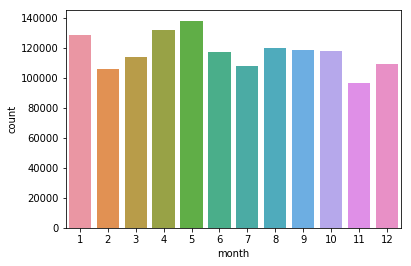

In [12]:
print("\nCountplot of Month: ")
month_countplot = sns.countplot(x = "month", data = df)
print(month_countplot)

In [13]:
# Converting year + month + day + hour + minute + second to datetime

datetime = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

In [14]:
# Adding datetime column to dataframe

df.insert(0, "datetime", datetime, True)

print(df)

                   datetime  year  month  day  hour  minute     L    MLT  \
0       2010-06-01 10:51:00  2010      6    1    10      51  9.13  22.69   
1       2010-06-01 10:52:00  2010      6    1    10      52  9.03  22.70   
2       2010-06-01 10:53:00  2010      6    1    10      53  9.02  22.70   
3       2010-06-01 10:54:00  2010      6    1    10      54  9.06  22.71   
4       2010-06-01 10:55:00  2010      6    1    10      55  8.95  22.72   
...                     ...   ...    ...  ...   ...     ...   ...    ...   
1659509 2018-02-28 14:56:00  2018      2   28    14      56  9.87  23.44   
1659510 2018-02-28 14:57:00  2018      2   28    14      57  9.93  23.45   
1659511 2018-02-28 14:58:00  2018      2   28    14      58  9.96  23.45   
1659512 2018-02-28 14:59:00  2018      2   28    14      59  9.92  23.46   
1659513 2018-02-28 15:00:00  2018      2   28    15       0  9.98  23.46   

         MLAT  AL Index  KP Index  Satellite Flag         B  
0       -1.43       -92  

In [15]:
# Dropping useless columns

df = df.drop(['year', 'month', 'day', 'hour', 'minute', 'AL Index', 'KP Index', 'Satellite Flag'], axis=1)
print(df)

                   datetime     L    MLT  MLAT         B
0       2010-06-01 10:51:00  9.13  22.69 -1.43  0.000765
1       2010-06-01 10:52:00  9.03  22.70 -1.44  0.000699
2       2010-06-01 10:53:00  9.02  22.70 -1.45  0.000786
3       2010-06-01 10:54:00  9.06  22.71 -1.46  0.000748
4       2010-06-01 10:55:00  8.95  22.72 -1.48  0.000933
...                     ...   ...    ...   ...       ...
1659509 2018-02-28 14:56:00  9.87  23.44 -8.84  0.001020
1659510 2018-02-28 14:57:00  9.93  23.45 -8.85  0.001040
1659511 2018-02-28 14:58:00  9.96  23.45 -8.85  0.001070
1659512 2018-02-28 14:59:00  9.92  23.46 -8.85  0.001050
1659513 2018-02-28 15:00:00  9.98  23.46 -8.86  0.001070

[1403762 rows x 5 columns]


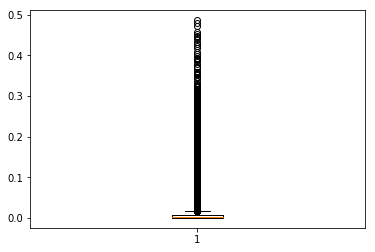

In [16]:
import matplotlib.pyplot as plt
B_box_plot = plt.boxplot(df['B'])

In [17]:
df_sorted = df.sort_values(by = 'B')
B_sorted = df_sorted['B']
print(B_sorted)

1563199    0.000121
1297665    0.000136
190729     0.000137
190780     0.000142
1535360    0.000145
             ...   
1497237    0.453000
1563198    0.457000
1007664    0.473000
1271061    0.479000
1037340    0.486000
Name: B, Length: 1403762, dtype: float64


(array([773., 580., 416., 398., 331., 198., 195., 143., 127., 101.,  78.,
         67.,  53.,  55.,  30.,  26.,  27.,  27.,  22.,   7.,  12.,   5.,
          6.,  12.,   8.,   9.,   6.,   6.,   3.,   1.,   3.,   7.,   4.,
          1.,   3.,   1.,   5.,   2.,   1.,   1.,   1.,   2.,   1.,   1.,
          2.,   2.,   0.,   0.,   1.,   2.]),
 array([0.125  , 0.13222, 0.13944, 0.14666, 0.15388, 0.1611 , 0.16832,
        0.17554, 0.18276, 0.18998, 0.1972 , 0.20442, 0.21164, 0.21886,
        0.22608, 0.2333 , 0.24052, 0.24774, 0.25496, 0.26218, 0.2694 ,
        0.27662, 0.28384, 0.29106, 0.29828, 0.3055 , 0.31272, 0.31994,
        0.32716, 0.33438, 0.3416 , 0.34882, 0.35604, 0.36326, 0.37048,
        0.3777 , 0.38492, 0.39214, 0.39936, 0.40658, 0.4138 , 0.42102,
        0.42824, 0.43546, 0.44268, 0.4499 , 0.45712, 0.46434, 0.47156,
        0.47878, 0.486  ]),
 <a list of 50 Patch objects>)

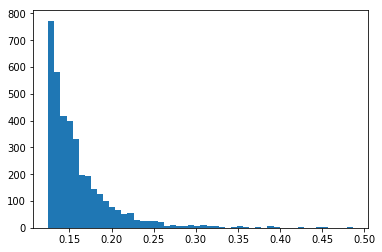

In [18]:
plt.hist(B_sorted[1400000:1403762], bins=50)

In [19]:
# Now we will split the area defined by L, MLT and MLAT into different regions and run LSTM for each region

# For L, the values range from 2-10
# For the Earth, L-shells uniquely define regions of particular geophysical interest. 
# Certain physical phenomena occur in the ionosphere and magnetosphere at characteristic L-shells. 
# For instance, auroral light displays are most common around L=6, 
# can reach L=4 during moderate disturbances, and during the most severe geomagnetic storms, may approach L=2. 
# The Van Allen radiation belts roughly correspond to L=1.5-2.5, and L=4-6. The plasmapause is typically around L=5.

# Group 1 : L = 2.0 - 2.5
# Group 2 : L = 2.5 - 4.0
# Group 3 : L = 4.0 - 6.0
# Group 4 : L = 6.0 - 8.0
# Group 5 : L = 8.0 - 10.0

L_split_points = [(2.5, 4.0), (4.0, 6.0), (4.0, 6.0), (6.0, 8.0), (8.0, 10.0)]

In [20]:
# Four Magnetic Local Time (MLT) sectors are considered, leading to four different K-derived MLT sector indices: 
#   aσDawn     (03–09 MLT), 
#   aσNoon     (09–15 MLT), 
#   aσDusk     (15–21 MLT), 
#   aσMidnight (21–03 MLT) indices. 
# They cover more than four solar cycles and, thus, allow robust statistical analysis.
# Link : https://www.researchgate.net/publication/260329903_The_K-derived_MLT_sector_geomagnetic_indices

MLT_split_points = [(3.0, 9.0), (9.0, 15.0), (15.0, 21.0), (21.0, 3.0)]

In [21]:
# MLAT Splits

MLAT_split_points = [(-10.0, -5.0), (-5.0, 0.0), (0.0, 5.0), (5.0, 10.0), (10.0, 15.0), (15.0, 20.0), (20.0, 25.0)]

In [22]:
# Splitting dataframe into many as per sectors

Sector_wise_dataframes = []

# Iterate over all L splits
for L_i, L_j in L_split_points:
    # Iterate over all MLT splits
    for MLT_i, MLT_j in MLT_split_points:
        # Iterate over all MLAT splits
        for MLAT_i, MLAT_j in MLAT_split_points:
            if(MLT_i <= MLT_j):
                temp = df[df.L.between(L_i, L_j) & df.MLT.between(MLT_i, MLT_j) & df.MLAT.between(MLAT_i, MLAT_j)]
            else:
                # This is to handle the case where MLT values are between 21 and 3, which represents midnight 
                #(and values circle around)
                temp1 = df[df.L.between(L_i, L_j) & (df.MLT > MLT_j) & df.MLAT.between(MLAT_i, MLAT_j)]
                temp2 = df[df.L.between(L_i, L_j) & (df.MLT < MLT_i) & df.MLAT.between(MLAT_i, MLAT_j)]
                temp = pd.concat([temp1, temp2])

            Sector_wise_dataframes.append(temp)

In [23]:
print(len(Sector_wise_dataframes))

140


In [24]:
from sklearn.preprocessing import MinMaxScaler
    

# Function enclosing model

# Models to try:
    # LSTM
        #LSTM are sensitive to scale of data, so we apply MinMax scaler
    # ARIMA
    # ARCH
    # VAR

# AIC and BIC for model selection.
# AIC and BIC help us strike a balance between complexity of model and how effective it is

Data types in dataframe:
 datetime    datetime64[ns]
B                  float64
dtype: object


(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330.]), <a list of 8 Text xticklabel objects>)

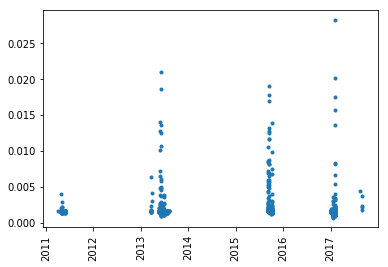

In [111]:
# Using just 1 dataframe for now

df0 = Sector_wise_dataframes[0]

# Dropping useless columns
df0 = df0.drop(columns=['L', 'MLT', 'MLAT'])

# Sorting
df0.sort_values(by = ['datetime'])

#print("Max val in df = ", np.max(df0))
#print("Min val in df = ", np.min(df0))

print("Data types in dataframe:\n",df0.dtypes)

# Plotting data for 1 sector to see if there's a trend
plt.plot(df0['datetime'], df0['B'], '.')
plt.xticks(rotation='vertical')

(array([734228., 734235., 734242., 734249., 734256., 734258., 734265.,
        734272., 734279., 734286.]), <a list of 10 Text xticklabel objects>)

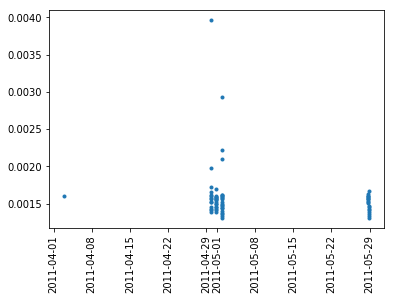

In [121]:
# There's a ton of missing data, so we pick the 2011 cluster to see if there's a pattern there

df0_2011 = df0.loc[(df0['datetime'] >= '2011-01-01 00:00:00') & (df0['datetime'] <= '2012-01-01 00:00:00')]
df0_2011.tail()

plt.plot(df0_2011['datetime'], df0_2011['B'], '.')
plt.xticks(rotation='vertical')

In [ ]:
# There's still a ton of missing data, probably because there's only 3 satellites taking measurements, 
# and since they are revolving around the earth, they move from sector to sector. So for each sector,
# we get a cluster of measurements, and then nothing.

# Maybe it's a better idea to pick satellite based data and try and predict the next measurement?

# SEE Satellite_based_analysis.ipynb!!!!!


In [92]:
# Scaling
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df0['B']).reshape(-1,1)) #The reshape converts the row of values into array with several rows with 1 value each

#Train test split
training_size = 0.7
training_row_limit = int(training_size*df.shape[0])
sections = np.split(df, indices_or_sections = [training_row_limit], axis = 0)
train = sections[0]
test = sections[1]

# HyperParameters
# Timesteps is how many previous observations we are dependent on
time_step = 100

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(dataset[i:(i+time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

X_train, y_train = create_dataset(train, time_step)
X_test, ytest = create_dataset(test, time_step)

In [81]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_reshaped =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [82]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [83]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train_reshaped,y_train,validation_data=(X_test_reshaped,ytest),epochs=100,batch_size=64,verbose=1)

Train on 469 samples, validate on 144 samples
Epoch 1/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0099 - val_loss: 0.0162
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0087 - val_loss: 0.0159
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0085 - val_loss: 0.0158
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0083 - val_loss: 0.0157
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0083 - val_loss: 0.0156
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0079 - val_loss: 0.0154
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0078 - val_loss: 0.0154
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0075 - val_loss: 0.0153
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0074 - val_loss: 0.0151
Epoch 10/100
469/469 [======================

In [86]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train_reshaped)
test_predict=model.predict(X_test_reshaped)

##Transformback to original form, reverse the effect of scaling
train_predict_unscaled = scaler.inverse_transform(train_predict)
test_predict_unscaled = scaler.inverse_transform(test_predict)
y_train_unscaled = scaler.inverse_transform(np.array(y_train).reshape(-1,1))
ytest_unscaled = scaler.inverse_transform(np.array(ytest).reshape(-1,1))

In [87]:
### Calculate RMSE performance metrics. RMSE on training data gives a benchmark to compare against.
import math
from sklearn.metrics import mean_squared_error
training_RMSE = math.sqrt(mean_squared_error(y_train_unscaled, train_predict_unscaled))
print("Training data RMSE: ", training_RMSE)

### Test Data RMSE
test_RMSE = math.sqrt(mean_squared_error(ytest_unscaled, test_predict_unscaled))
print("Testing data RMSE: ", test_RMSE)

Training data RMSE:  0.0018630647113388498
Testing data RMSE:  0.0037145273888825295


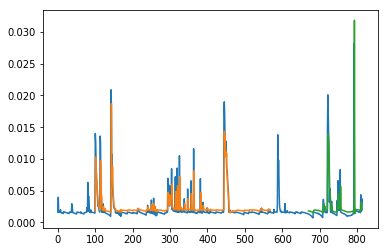

In [88]:
### Plotting 
# shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_unscaled)+look_back, :] = train_predict_unscaled

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_unscaled)+(look_back*2)+1:len(df)-1, :] = test_predict_unscaled

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [99]:
#ARIMA

df0.head()
df0.tail()

,datetime,B
1550383,2017-08-18 19:00:00,0.00434
1564536,2017-09-01 21:40:00,0.00229
1564537,2017-09-01 21:41:00,0.00178
1564538,2017-09-01 21:42:00,0.00210
1564539,2017-09-01 21:43:00,0.00365
